# Lab 01

# PyTorch

[PyTorch](https://pytorch.org/) is an open source machine learning library used for applications such as natural language processing and computer vision. It is based on the [Torch](http://torch.ch/) library.

Before we use Pytorch it is (obviously) neccessary to understand what Pytorch is. Let's start from the two core concepts: **Tensor**, **(Computational) Graph** and **Automatic Differentiation**


## Tensor
A tensor is a generalization of vectors and matrices to potentially higher dimensions. It is the primary data structure used by neural networks. Normally, we can use **nd**-tensor to call any of its instances where **nd** stands for **n** **dimensional**.

There are three basic attributes we need to know about tensors:
*   *Rank*: The number of dimensions present within the tensor. e.g. rank-2 tensor means 2d-tensor.
*   *Axes*: Used to refer to a specific dimensions. The number of axes equals to the number of dimensions. The length of an axis represents the number of elements running along this axis. 
*   *Shape*: Formed by the length of each axis. e.g. shape(1,2) means a 2d-tensor with the first axis of length 1 and the second axis of length 2. 


![Tensor_Rank](https://drive.google.com/uc?id=1o5wulLHGxUuPxH3t3xfV8U7d2CrsL1oG)


A [torch.Tensor](https://pytorch.org/docs/stable/tensors.html) (tensor in PyTorch) has the following key properties : 
*   *torch.dtype*: an object representing the data type of a torch.Tensor. e.g. torch.float32
*   *torch.device*: an object representing the device on which a torch.Tensor is or will be allocated. e.g. CPU or CUDA (GPU)
*   *torch.layout*: an object representing the memory layout of a torch.Tensor.

More details with illustrative examples can be found [here](https://pytorch.org/docs/stable/tensor_attributes.html#tensor-attributes-doc) 




## Computational Graph and Automatic Differentiation
PyTorch uses (directed acyclic) computational graphs  to graph the functional operations that are applied to tensors inside neural networks so as to computationally calculate derivatives for the network optimization. In graphs, the nodes are Tensors while the eages are functions that produce output Tensors from input Tensors (e.g. summation, mutiplication). Those graphs enable PyTorch to do the automatic differentiation for us, i.e. it can automatically calculate the derivatives that are needed for network optimization. We will learn more about it through pratical examples in following sections.

Specifically, PyTorch generates the computational graph on the fly as when operations are created during forward passes in neural networks, which is refered as dynamic computational graph. This is the one of the main differences between PyTorch and TensorFlow which uses static computational graphs.  



## Importing PyTorch library
[Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb) has torch library installed as default so you just need to import it as below:

In [ ]:
import torch
print(torch.__version__) #check version

1.7.1+cu101


## Tensor creation
With PyTorch, we will be implementing lots of models. To get started, let's  have a look at how to create a tensor.

We can creating tensors **with numerical data**, typically numpy arrays.

In [ ]:
import numpy as np

# Scalar (0 Rank)
data = torch.tensor(1)
print(data.shape)


# Vector (1 Rank)
data = np.array([1,2]) 
data = torch.Tensor(data)
print(data.shape)


# Matrix (2 Rank)
data = np.ones((2,2,)) 
data = torch.Tensor(data)
print(data.shape)


# Cube (3 Rank)
data = np.ones((2,2,2)) 
data = torch.Tensor(data)
print(data.shape)


# Vector of cubes (4 Rank)
data = np.ones((2,2,2,2)) 
data = torch.Tensor(data)
print(data.shape)

torch.Size([])
torch.Size([2])
torch.Size([2, 2])
torch.Size([2, 2, 2])
torch.Size([2, 2, 2, 2])


Notice that although both torch.Tensor() and torch.tensor() can be used to  generate tensors, there are some differences:

*   uppercase T VS. lowercase t (obviously)
*   torch.Tensor() is the constructor of the torch.Tensor class while the torch.tensor() is a factory function that constructs torch.Tensor objects and return them to the caller 
*   torch.Tensor() can return an empty tensor without specifying incoming data while torch.tensor() with no input data will prouduce a TypeError (you can try)
*   torch.Tensor uses the default dtype "float32" while the torch.tensor() choose the same dtype based on the incoming data (type inference), this can be easily illustrated through following example:



In [ ]:
data = np.array([1,2]) 
print(data.dtype)

data_T = torch.Tensor(data)
print(data_T)
print(data_T.dtype)
print(data_T.dtype==torch.get_default_dtype()) #get the torch default data type, 

#which can also be changed through 'torch.set_default_dtype(dtype)'
print()

data_t = torch.tensor(data)
print(data_t)
print(data_t.dtype)
print()

#we can also specify a datatype with torch.tensor()
data_t = torch.tensor(data, dtype=torch.float64)
print(data_t)
print(data_t.dtype)

int64
tensor([1., 2.])
torch.float32
True

tensor([1, 2])
torch.int64

tensor([1., 2.], dtype=torch.float64)
torch.float64


Expect for torch.Tensor() and torch.tensor(), We can also use torch.as_tensor and torch.from_numpy

In [ ]:
# Create tensor using torch.as_tensor 
data = np.ones((2,2,2)) 
data = torch.as_tensor(data)
print(data.shape)

# Create tensor using torch.from_numpy
data = np.ones((2,2,2,2))
data = torch.from_numpy(data)
print(data.shape)

torch.Size([2, 2, 2])
torch.Size([2, 2, 2, 2])


Alternatively, we can also create tensors **without data** using factory functions

In [ ]:
# torch.eye: Returns an identity matrix 
torch.eye(2)

tensor([[1., 0.],
        [0., 1.]])

In [ ]:
# torch.zeros: Returns a tensor of given shape filled with all zeros
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
# torch.ones: Returns a tensor of given shape filled with all ones
torch.ones(2,2)

tensor([[1., 1.],
        [1., 1.]])

In [ ]:
# torch.rand: Returns a tensor of given shape filled with values drawn from a uniform distribution on [0, 1).
torch.rand(2,2)

tensor([[0.7636, 0.4176],
        [0.0720, 0.8193]])

More factory functions for tensor creation can be found [here](https://pytorch.org/cppdocs/notes/tensor_creation.html#factory-functions)

## Basic tensor operations

The list of operations with examples can be found [here](https://pytorch.org/docs/stable/torch.html#math-operations). Please go through and try to practise yourself with examples before you move on. You don't need to remember all of them, you can easily refer back when needed.

## Simple Linear Regression

![Linear_Regression](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/320px-Linear_regression.svg.png)

The following code implements a simple linear regression algorithm.



### Linear Regression from scratch

Prepare data

In [ ]:
import numpy
import matplotlib.pyplot as plt
import torch

# training data
x_training = numpy.asarray([1,2,5,8,9,12,14,16,18,20])
y_training = numpy.asarray([1500,3500,7200,11000,12500,18500,22000,24500,28000,30500])

x_test = numpy.asarray([3,7,13,15,19])
y_test = numpy.asarray([4400,10000,19500,23500,29000])

# creating tensor for trainig from training data
x_data = torch.from_numpy(x_training)
y_data = torch.from_numpy(y_training)
x_test_data = torch.from_numpy(x_test)
y_test_data = torch.from_numpy(y_test)


 Once the dataset is prepared, we can start defining our model architecture
 
 Let's first build it from scratch so as to gain a clear understanding about how the automatic differentiation works



In [ ]:
# Define weights and biases
weight = torch.tensor(numpy.random.randn(), requires_grad=True)
bias = torch.tensor(numpy.random.randn(), requires_grad=True)
print(weight)
print(bias)

tensor(-0.2292, requires_grad=True)
tensor(-0.8609, requires_grad=True)


Note that we set 'requires_grad=True' above, which turns on the automatic gradient computation for weight and bias.

Every Tensor has a flag: 'requires_grad' that allows for fine grained exclusion of subgraphs from gradient computation and can increase efficiency. If there’s a single input to an operation that requires gradient, its output will also require gradient. Conversely, only if all inputs don’t require gradient, the output also won’t require it. Backward computation is never performed in the subgraphs, where all Tensors didn’t require gradients.

In [ ]:
# Define the model
# Hypothesis = W * X + b (Linear Model)
def linearRegression(x):
  return x * weight + bias

In [ ]:
# Generate predictions and compare with ground truth labels
# As we can see, we randomly initialise the weight and bias, the model does not predict properly at the moment
predictions = linearRegression(x_data)
print(predictions)
print(y_data)

tensor([-1.0901, -1.3193, -2.0068, -2.6944, -2.9236, -3.6111, -4.0695, -4.5278,
        -4.9862, -5.4446], grad_fn=<AddBackward0>)
tensor([ 1500,  3500,  7200, 11000, 12500, 18500, 22000, 24500, 28000, 30500])


In [ ]:
# Define loss function 
# here we use mean squared error (MSE)
def mse(x1, x2):
  diff = x1 - x2
  return torch.sum(diff*diff)/diff.numel()

In [ ]:
# Compute loss
# As we all know, the lower, the better
loss = mse(predictions, y_data)
print(loss)

tensor(3.4857e+08, grad_fn=<DivBackward0>)


As is mentioned, PyTorch automatically compute the gradient/derivative of the loss (with regard to the weight and bias here). This was enabled when we set 'requires_grad=True' to them.

All we need to do now is to call the backward() over our loss, which will trigger the automatical computation of gradients based on the chain rule.

In [ ]:
# Compute gradients
loss.backward()

After the backward passing, the gradients are stored in the .grad property of the involved tensors. Let's have a look.

In [ ]:
# Gradient for weight
print(weight)
print(weight.grad)
print()

# Gradient for bias
print(bias)
print(bias.grad)

tensor(-0.2292, requires_grad=True)
tensor(-456286.6250)

tensor(-0.8609, requires_grad=True)
tensor(-31846.5371)


Now we can easily adjust the weight and bias using the gradients.

We need to reset the gradients before the next forward pass, because PyTorch accumulates gradients.

In [ ]:
# We do not want gradient for the update operation
# There will not be automatic gradient computation within the torch.no_grad() 
# We use learning rate of 1e-5 here

with torch.no_grad(): 
  weight -= weight.grad * 1e-5
  bias -= bias * 1e-5
  # remember to reset the gradients
  weight.grad.zero_()
  bias.grad.zero_()
print(weight)
print(bias)


tensor(4.3337, requires_grad=True)
tensor(-0.8609, requires_grad=True)


In [ ]:
print(weight.grad)
print(bias.grad)

tensor(0.)
tensor(0.)


Let's predict and compute loss again. The loss should be lower with new weights and biases

In [ ]:
predictions = linearRegression(x_data)
loss = mse(predictions, y_data)
print(loss)

tensor(3.4649e+08, grad_fn=<DivBackward0>)


Hope you now have an initial clear understanding of how automatic gradient computing works.

Let's start training the model for multiple epochs.

We can just simply create python loop to do it.

Epoch: 0000 loss= 344410624.00000000 W= 8.8829 b= -0.5434
Epoch: 0200 loss= 103652992.00000000 W= 691.4767 b= 46.9696
Epoch: 0400 loss= 31407328.00000000 W= 1065.4122 b= 72.7668
Epoch: 0600 loss= 9728059.00000000 W= 1270.2671 b= 86.6685
Epoch: 0800 loss= 3222532.25000000 W= 1382.5010 b= 94.0543
Epoch: 1000 loss= 1270271.00000000 W= 1443.9985 b= 97.8709
Epoch: 1200 loss= 684355.43750000 W= 1477.7026 b= 99.7325
Epoch: 1400 loss= 508454.15625000 W= 1496.1807 b= 100.5235
Epoch: 1600 loss= 455579.31250000 W= 1506.3187 b= 100.7283
Epoch: 1800 loss= 439621.15625000 W= 1511.8889 b= 100.6122
Epoch: 2000 loss= 434742.25000000 W= 1514.9563 b= 100.3205
Epoch: 2200 loss= 433188.59375000 W= 1516.6526 b= 99.9329
Epoch: 2400 loss= 432633.93750000 W= 1517.5979 b= 99.4930
Epoch: 2600 loss= 432377.68750000 W= 1518.1317 b= 99.0246
Epoch: 2800 loss= 432212.56250000 W= 1518.4402 b= 98.5410
Epoch: 3000 loss= 432074.00000000 W= 1518.6244 b= 98.0491
Epoch: 3200 loss= 431944.06250000 W= 1518.7411 b= 97.5530
Epo

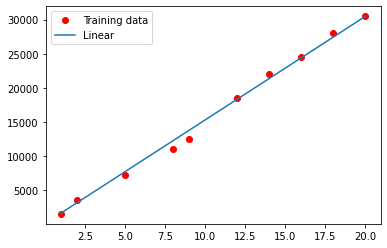

Testing loss= 218860.078125000
Absolute mean square loss difference: 211955.671875000


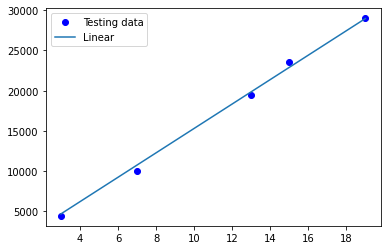

In [ ]:
# An epoch is one iteration over the entire input data
no_of_epochs = 5000
# How often you want to display training info.
display_interval = 200

for epoch in range(no_of_epochs):
  predictions = linearRegression(x_data)
  loss = mse(predictions, y_data)
  loss.backward()
  with torch.no_grad():
    weight -= weight.grad * 1e-5
    bias -= bias.grad * 1e-5
    weight.grad.zero_()
    bias.grad.zero_()
  if epoch % display_interval == 0 :
      # calculate the cost of the current model
      predictions = linearRegression(x_data)
      loss = mse(predictions, y_data)           
      print("Epoch:", '%04d' %(epoch), "loss=", "{:.8f}".format(loss), "W=", "{:.4f}".format(weight), "b=",  "{:.4f}".format(bias))

print("=========================================================")
training_loss = mse(linearRegression(x_data), y_data)   
print("Optimised:", "loss=", "{:.9f}".format(training_loss.data), \
              "W=", "{:.9f}".format(weight.data), "b=", "{:.9f}".format(bias.data))
    
# Plot training data on the graph
plt.plot(x_training, y_training, 'ro', label='Training data')
plt.plot(x_training, weight.data * x_training + bias.data, label='Linear')
plt.legend()
plt.show()

# Calculate testing loss
testing_loss = mse(linearRegression(x_test_data), y_test_data) 
print("Testing loss=", "{:.9f}".format(testing_loss.data))
print("Absolute mean square loss difference:", "{:.9f}".format(abs(
      training_loss.data - testing_loss.data)))
  
# Plot testing data on the graph
plt.plot(x_test, y_test, 'bo', label='Testing data')
plt.plot(x_test, weight.data * x_test + bias.data, label='Linear')
plt.legend()
plt.show()

### Linear Regression using PyTorch built-ins

Prepare data

In [ ]:
import numpy
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# training data: this time we use 2d array
# Assuming we have 90 samples of 10 features about a house condition, such as bedroom number, distance to city center etc.
# and will predict the house price 
x_data = torch.randn(90, 10)
y_data = torch.randn(90, 1)

# testing data:
x_test_data = torch.randn(10, 10)
y_test_data = torch.randn(10, 1)



This time we don't need to initialize the weight and bias manually. Instead, we will define the model using the built-in [torch.nn.Linear](https://pytorch.org/docs/stable/nn.html#linear).

[**torch.nn**](https://pytorch.org/docs/stable/nn.html) is a subpackage that contains modules and extensible classes for us to build neural networks.



In [ ]:
# Define model
linearRegression =  nn.Linear(10,1)
print(linearRegression.weight)
print(linearRegression.bias)

Parameter containing:
tensor([[-0.0140, -0.0774, -0.2631,  0.3152, -0.2011, -0.2240,  0.1659, -0.2902,
         -0.2685, -0.0984]], requires_grad=True)
Parameter containing:
tensor([-0.2102], requires_grad=True)


Similarly, we don't manually updating the weight and bias using gradients by ourselves. Instead, we will use the optimizer optim.SGD.

[**torch.optim**](https://pytorch.org/docs/stable/optim.html) is a subpackage that contains the standard optimization operations like Adam and SGD.



In [ ]:
# Define optimizer
# Just pass the model parameters to be updated and specify the learning rate when calling optim.SGD
# SGD optimizer in PyTorch actually is Mini-batch Gradient Descent with momentum.
# In this case, as the batch size of our model is N, SGD here is actually Batch Gradient Descent.
optimizer = torch.optim.SGD(linearRegression.parameters(), lr=1e-5)

Again, we use the built-in loss function mse_loss instead of defining it manually.

We will need the [**torch.nn.functional**](https://pytorch.org/docs/stable/nn.functional.html) interface, which contains typical operations used for building neural networks such as convolution operations, activation functions and loss functions we need here.

In [ ]:
# Import nn.functional 
import torch.nn.functional as F

# Define the loss function
loss_func = F.mse_loss

# Calculate loss
loss = loss_func(linearRegression(x_data), y_data)
print(loss)

tensor(1.1964, grad_fn=<MseLossBackward>)


Train the model

In [ ]:
# An epoch is one iteration over the entire input data
no_of_epochs = 5000
# How often you want to display training info.
display_interval = 200

for epoch in range(no_of_epochs):
  predictions = linearRegression(x_data)
  loss = loss_func(predictions, y_data)
  loss.backward()
  optimizer.step() #call step() to automatically update the parameters through our defined optimizer, which can be called once after backward()
  optimizer.zero_grad() #reset the gradient as what we did before
  if epoch % display_interval == 0 :
      # calculate the cost of the current model
      predictions = linearRegression(x_data)
      loss = loss_func(predictions, y_data)          
      print("Epoch:", '%04d' % (epoch), "loss=", "{:.8f}".format(loss))

print("=========================================================")
training_loss = mse(linearRegression(x_data), y_data)   
print("Optimised:", "loss=", "{:.9f}".format(training_loss.data))


# Calculate testing loss
testing_loss = loss_func(linearRegression(x_test_data), y_test_data) 
print("Testing loss=", "{:.9f}".format(testing_loss.data))
print("Absolute mean square loss difference:", "{:.9f}".format(abs(
      training_loss.data - testing_loss.data)))

Epoch: 0000 loss= 1.19639134
Epoch: 0200 loss= 1.19183135
Epoch: 0400 loss= 1.18731523
Epoch: 0600 loss= 1.18284488
Epoch: 0800 loss= 1.17841876
Epoch: 1000 loss= 1.17403519
Epoch: 1200 loss= 1.16969395
Epoch: 1400 loss= 1.16539490
Epoch: 1600 loss= 1.16113830
Epoch: 1800 loss= 1.15692353
Epoch: 2000 loss= 1.15274978
Epoch: 2200 loss= 1.14861631
Epoch: 2400 loss= 1.14452243
Epoch: 2600 loss= 1.14046931
Epoch: 2800 loss= 1.13645589
Epoch: 3000 loss= 1.13248062
Epoch: 3200 loss= 1.12854278
Epoch: 3400 loss= 1.12464273
Epoch: 3600 loss= 1.12078166
Epoch: 3800 loss= 1.11695743
Epoch: 4000 loss= 1.11317015
Epoch: 4200 loss= 1.10941863
Epoch: 4400 loss= 1.10570264
Epoch: 4600 loss= 1.10202360
Epoch: 4800 loss= 1.09837914
Optimised: loss= 1.094786763
Testing loss= 1.086732626
Absolute mean square loss difference: 0.008054137


# NLTK Library and WordNet

WordNet® is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept.

In Python, NLTK library includes English WordNet.

**To use wordnet, you need to download the wordnet data via NLTK library**

 * **[NLTK](https://www.nltk.org/)** is a **N**atural **L**anguage **T**ool**k**iit for python. 

In [ ]:
import nltk

## WordNet

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.corpus import wordnet as wn

Let's get a set of synonyms that share a common meaning.

In [ ]:
dog = wn.synset('dog.n.01')
person = wn.synset('person.n.01')
cat = wn.synset('cat.n.01')
computer = wn.synset('computer.n.01')

### path_similarity()
path_similarity() returns a score denoting how similar two word senses are, based on the shortest path that connects the senses in the is-a (hypernym/hypnoym) taxonomy. The score is in the range 0 to 1.

In [ ]:
print("dog<->cat : ", wn.path_similarity(dog,cat))
print("person<->cat : ", wn.path_similarity(person,cat))
print("person<->dog : ", wn.path_similarity(person,dog))
print("person<->computer : ", wn.path_similarity(person,computer))

dog<->cat :  0.2
person<->cat :  0.1
person<->dog :  0.2
person<->computer :  0.1111111111111111


### Wu-Palmer Similarity (wup_similarity() )
wup_similarity() returns a score denoting how similar two word senses are, based on the depth of the two senses in the taxonomy and that of their Least Common Subsumer (most specific ancestor node).

In [ ]:
print("dog<->cat : ", wn.wup_similarity(dog,cat))
print("person<->cat : ", wn.wup_similarity(person,cat))
print("person<->dog : ", wn.wup_similarity(person,dog))
print("person<->computer : ", wn.wup_similarity(person,computer))

dog<->cat :  0.8571428571428571
person<->cat :  0.5714285714285714
person<->dog :  0.75
person<->computer :  0.5


# TFIDF (Term Frequency Inverse Document Frequency)

TFIDF is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.


**Tokenization**

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

import re
import numpy as np

nltk.download('stopwords')
from nltk.corpus import stopwords as sw

corpus = [
    'Caren loves the NLP. The NLP hates Caren', #document 1
    'Caren hates the NLP' #document 2
]

# Tokenize sentences - for only doc1
tokenized_sentence = sent_tokenize(corpus[0])
print("\ntokenized_sentence: ")
print(tokenized_sentence)

# Remove punctuations - for only doc1
clean_doc1 = re.sub(r'[^\w\s]','',corpus[0])
print("\nclean_sentence: ")
print(clean_doc1)

# Tokenize words - for only doc1
tokenized_doc1 = word_tokenize(clean_doc1)
print("\ntokenized_word: ")
print(tokenized_doc1)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokenized_doc1]
print("\nlower_case: ")
print(lower_tokens)

# stop word removal
sww = sw.words()
tokenized_doc1 = [w for w in lower_tokens if not w in sww]
print("\ntokensized_word (in lower case, w/o stopwords): ")
print(tokenized_doc1)

# same process for doc2
clean_doc2 = re.sub(r'[^\w\s]','',corpus[1])
tokenized_doc2 = word_tokenize(clean_doc2)
lower_tokens2 = [t.lower() for t in tokenized_doc2]
tokenized_doc2 = [w for w in lower_tokens2 if not w in sww]

tokensized_docs = [tokenized_doc1, tokenized_doc2]
print("\nfinal_docs: ")
print(tokensized_docs[0])
print(tokensized_docs[1])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.

tokenized_sentence: 
['Caren loves the NLP.', 'The NLP hates Caren']

clean_sentence: 
Caren loves the NLP The NLP hates Caren

tokenized_word: 
['Caren', 'loves', 'the', 'NLP', 'The', 'NLP', 'hates', 'Caren']

lower_case: 
['caren', 'loves', 'the', 'nlp', 'the', 'nlp', 'hates', 'caren']

tokensized_word (in lower case, w/o stopwords): 
['caren', 'loves', 'nlp', 'nlp', 'hates', 'caren']

final_docs: 
['caren', 'loves', 'nlp', 'nlp', 'hates', 'caren']
['caren', 'hates', 'nlp']


**Document Frequency (DF)**

DF is the count of occurrences of term t in the document set N

*df(t) = occurrence of t in documents*

*idf(t) = log(N/(df + 1))*



In [ ]:
DF = {}

for tokensized_doc in tokensized_docs:
    # get each unique word in the doc - and count the number of occurrences in the document
    for term in np.unique(tokensized_doc):
        try:
            DF[term] +=1
        except:
            DF[term] =1

DF

{'caren': 2, 'hates': 2, 'loves': 1, 'nlp': 2}

In [ ]:
DF['caren']

2

**TF-IDF calculation**

In the following sample code, we will use [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) to easily count the word occurance in a document. [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) is a Python class that enables counting for elements from an iterable.

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import math


tf_idf = {}

# total number of documents
N = len(tokensized_docs) 

doc_id = 0
# get each tokenised doc
for tokensized_doc in tokensized_docs:
    # initialise counter for the doc
    counter = Counter(tokensized_doc)
    # calculate total number of words in the doc
    total_num_words = len(tokensized_doc)    

    # get each unique word in the doc
    for term in np.unique(tokensized_doc):

        # calculate Term Frequency 
        tf = counter[term]/total_num_words
        
        # calculate Document Frequency
        df = DF[term]

        # calculate Inverse Document Frequency
        idf = math.log(N/(df+1))+1

        # calculate TF-IDF
        tf_idf[doc_id, term] = tf*idf

    doc_id += 1

tf_idf

{(0, 'caren'): 0.19817829729727854,
 (0, 'hates'): 0.09908914864863927,
 (0, 'loves'): 0.16666666666666666,
 (0, 'nlp'): 0.19817829729727854,
 (1, 'caren'): 0.19817829729727854,
 (1, 'hates'): 0.19817829729727854,
 (1, 'nlp'): 0.19817829729727854}

**Sort by the importance - Descending Order**

We use Python built-in function [sorted](https://docs.python.org/3/howto/sorting.html) for sorting the words based on its tf_idf values.

In [ ]:
import numpy as np
#sort the dictionary based on values
dict_exmaple = tf_idf
sorted_dict = sorted(dict_exmaple.items(), key=lambda x: x[1], reverse=True)
sorted_dict

[((0, 'caren'), 0.19817829729727854),
 ((0, 'nlp'), 0.19817829729727854),
 ((1, 'caren'), 0.19817829729727854),
 ((1, 'hates'), 0.19817829729727854),
 ((1, 'nlp'), 0.19817829729727854),
 ((0, 'loves'), 0.16666666666666666),
 ((0, 'hates'), 0.09908914864863927)]

# Exercise
Please complete the following **two questions** E1 and E2 and you should submit **"ipynb" file to Canvas** (You can download it from "File" > "Download .ipynb").

##E1. What are the advantages of using TF-IDF over TF (Term Frequency)?
Please write down your answer below with a **supportive example**, using your own words. 

In [ ]:
#@Lab01 - E1

Answer = " Type in here " #@param {type:"raw"}

## E2. Write a function which returns the top N (e.g. 10 or 20) words with the largest TF value and with the largest TF-IDF values for a paragraph of corpus (Wikipedia page).

In thise exercise, we will simply use the documents by using the [wikipedia library](https://pypi.org/project/wikipedia/), which is a Python library that makes it easy to access and parse data from Wikipedia. 

In [ ]:
# Install and import the wikipedia library
!pip install wikipedia
import wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp37-none-any.whl size=11686 sha256=4df623ec70142df94d2e7a00e7598f67bd3e14d482d8c069dd8a088c0dc95284
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [ ]:
# Let's collect the page content from the following COVID-19 related wiki pages as documents
# by using wikipedia.page(COVID).content, which returns a list of COVID-19 related documents 
COVID_docs = ["COVID-19_pandemic", "Coronavirus_disease_2019", "Long_COVID"]
documents = [wikipedia.page(COVID).content for COVID in COVID_docs]

documents


['The COVID-19 pandemic, also known as the coronavirus pandemic, is an ongoing pandemic of coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It was first identified in December 2019 in Wuhan, China. The World Health Organization declared the outbreak a Public Health Emergency of International Concern in January 2020 and a pandemic in March 2020. As of 4 March 2021, more than 115 million cases have been confirmed, with more than 2.56 million deaths attributed to COVID-19, making it one of the deadliest pandemics in history.\nSymptoms of COVID-19 are highly variable, ranging from none to life-threatening illness. The virus spreads mainly through the air when people are near each other. It leaves an infected person as they breathe, cough, sneeze, or speak and enters another person via their mouth, nose, or eyes. It may also spread via contaminated surfaces. People remain infectious for up to two weeks, and can spread the virus even

### Complete this section


Please fill in the following functions with code body: 

Pass both the (list of) documents and the number of (top) words to focus into the function.

In the function, you may:
  
*   process the documents (e.g. tokenization) - provided in the sample code above. **Please add two additional stop words: covid19 and covid.**
*   calculate the tf/tfidf values for each unique words ([Counter](https://docs.python.org/3/library/collections.html#collections.Counter) can be a one of the good choices)
*   sorting the words based on the tf/tfidf values (Using Python built-in function [sorted](https://docs.python.org/3/howto/sorting.html) might be helpful for sorting)
*   print out the top n tf words tfidf words from the sorted list in parallel for comparison

In your final submission, the print log should be kept in the cell execution output field. Note that you can write extra functions if you need, but do remember to include the functions in this section for final submission.

  
  
  

In [ ]:


def get_tf_and_idf(corpus, top_n):
  ## Write your code body here

  # process the document (** add covid19 and covid as two additional stop words)

  # calculate the tf/tfidf values for each unique words

  # sorting the words based on the tf/tfidf valuse

  # print out the top n tf words and top n tfidf words from the sorted list in parallel for comparision
  
   
# Call the funtion, the execution print out log should be kept for submission
get_tf_and_idf(corpus, 10)